# Análisis en accidentes de transito

Analizando un DataSet de homicidios en accidentes de transito en Colombia entre los años 2010-2021

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Importamos DataSet
df_accidents = pd.read_csv('DataSet/Homicidios_accidente_de_tr_nsito_Polic_a_Nacional.csv')
df_accidents

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001000,MOTO,1/01/2010,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592000,MOTO,1/01/2010,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
...,...,...,...,...,...,...,...,...,...
57729,HUILA,PITALITO,41551000,NaN,31/12/2021,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
57730,META,PUERTO RICO,50590000,NaN,31/12/2021,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
57731,QUINDÍO,ARMENIA (CT),63001000,NaN,31/12/2021,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
57732,VALLE,CALI (CT),76001000,NaN,31/12/2021,FEMENINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


## Preprocesamiento de los datos

In [4]:
#Renombramos las columnas por comodidad
columns_rename = {column:column.capitalize().replace(' ','_') for column in list(df_accidents)}
df_accidents.rename(columns=columns_rename, inplace=True)

In [5]:
df_accidents.dtypes

Departamento            object
Municipio               object
Codigo_dane              int64
Armas_medios            object
Fecha_hecho             object
Genero                  object
Grupo_etarío            object
Descripción_conducta    object
Cantidad                 int64
dtype: object

In [6]:
#Definimos las columnas con valores categorícos
df_accidents[['Departamento', 'Municipio', 
              'Codigo_dane', 'Armas_medios', 
              'Genero', 'Grupo_etarío', 
              'Descripción_conducta']] = df_accidents[['Departamento', 'Municipio', 
                                                       'Codigo_dane', 'Armas_medios', 
                                                       'Genero', 'Grupo_etarío', 
                                                       'Descripción_conducta']].astype('category')

In [7]:
#Definimos la columna con formato de fecha
df_accidents['Fecha_hecho'] = pd.to_datetime(df_accidents['Fecha_hecho'], format='%d/%m/%Y')

In [8]:
df_accidents.describe(include='all', datetime_is_numeric=True)

,Departamento,Municipio,Codigo_dane,Armas_medios,Fecha_hecho,Genero,Grupo_etarío,Descripción_conducta,Cantidad
count,57734,57734,"57,734.00",54820,57734,57692,57692,57734,"57,734.00"
unique,32,966,"1,038.00",7,NaN,3,3,2,NaN
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),"11,001,000.00",VEHICULO,NaN,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,NaN
freq,8745,4663,"4,663.00",33674,NaN,45784,52739,57724,NaN
mean,NaN,NaN,NaN,NaN,2016-06-12 19:12:04.190251776,NaN,NaN,NaN,1.10
min,NaN,NaN,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,1.00
25%,NaN,NaN,NaN,NaN,2013-07-23 00:00:00,NaN,NaN,NaN,1.00
50%,NaN,NaN,NaN,NaN,2016-08-20 00:00:00,NaN,NaN,NaN,1.00
75%,NaN,NaN,NaN,NaN,2019-06-01 00:00:00,NaN,NaN,NaN,1.00
max,NaN,NaN,NaN,NaN,2021-12-31 00:00:00,NaN,NaN,NaN,10.00


## Procesando Datos

### ¿Cuántos accidentes han ocurrido por año?

In [9]:
#Copiamos el DataFrame original
df_copy = df_accidents.copy()
df_copy['Total'] = 1

In [10]:
#Agrupamos por año
fecha_cant_total = df_copy.groupby('Fecha_hecho').sum()
fecha_cant_total_año = fecha_cant_total.resample('Y').sum()
rename_index = {index:index.year for index in fecha_cant_total_año.index}
fecha_cant_total_año = fecha_cant_total_año.rename(index=rename_index)
fecha_cant_total_año

,Cantidad,Total
Fecha_hecho,,
2010,4500,3996
2011,4295,3815
2012,4549,4076
2013,4922,4450
2014,4835,4376
2015,5344,4888
2016,5609,5189
2017,5261,4844
2018,6017,5532


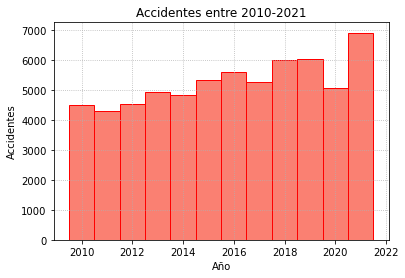

In [11]:
#Realizamos una representación gráfica de la tabla obtenida anteriormente
año = fecha_cant_total_año.index
cantidad = fecha_cant_total_año['Cantidad'].values

x = np.arange(len(año))

fig, ax = plt.subplots()
ax.grid(linestyle=':')

ax.bar(año, cantidad, width=1, color='salmon', edgecolor="red", linewidth=1)
ax.set_xlabel('Año')
ax.set_ylabel('Accidentes')
ax.set_title('Accidentes entre 2010-2021')
fig.savefig('Imgs/img_accidentes_año.pdf')
fig.savefig('Imgs/img_accidentes_año.jpeg')

plt.show()


Finalemente obtenemos la siguiente tabla:

|Año|Involucrados|Accidentes|
|:--:|:--:|:--:|
|2010|4500|3996|
|2011|4295|3815|
|2012|4549|4076|
|2013|4922|4450|
|2014|4835|4376|
|2015|5344|4888|
|2016|5609|5189|
|2017|5261|4844|
|2018|6017|5532|
|2019|6053|5561|
|2020|5068|4684|
|2021|6914|6323|

- Involucrados: Cantidad de personas en accidentes
- Accidentes: Cantidad de accidentes

### ¿Cuántos accidentes han ocurrido en cada mes?

In [12]:
#Copiamos el DataFrame original
df_copy_2 = df_accidents.copy()
df_copy_2['Total'] = 1
df_copy_2['Mes'] = df_copy_2['Fecha_hecho'].dt.month.astype('category')
df_copy_2['Año'] = df_copy_2['Fecha_hecho'].dt.year.astype('category')

In [13]:
df_month_sum = df_copy_2.groupby('Mes').sum()
df_month_sum['Mean'] = df_month_sum['Total'] / 12
df_month_sum

,Cantidad,Total,Mean
Mes,,,
1,5383,4939,411.58
2,4993,4573,381.08
3,5306,4793,399.42
4,4740,4307,358.92
5,4996,4536,378.00
6,5207,4743,395.25
7,5335,4845,403.75
8,5193,4767,397.25
9,5235,4791,399.25


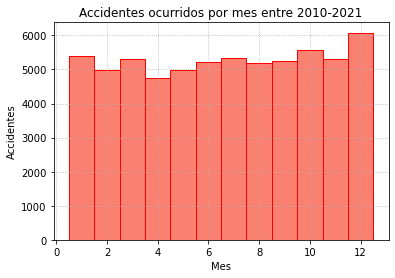

In [14]:
mes = list(df_month_sum.index)
cantidad_m = df_month_sum['Cantidad'].values

fig, ax = plt.subplots()
ax.grid(linestyle=':')

ax.bar(mes, cantidad_m, width=1, color='salmon', edgecolor="red", linewidth=1)
ax.set_xlabel('Mes')
ax.set_ylabel('Accidentes')
ax.set_title('Accidentes ocurridos por mes entre 2010-2021')
fig.savefig('Imgs/img_accidentes_mes.pdf')
fig.savefig('Imgs/img_accidentes_mes.jpeg')

plt.show()

Obtenemos entonces la siguiente tabla:

|Mes|Involucrados|Accidentes|Promedio|
|:---:|:---:|:---:|:---:|
|Enero|5383|4939|411.58|
|Febrero|4993|4573|381.08|
|Marzo|5306|4793|399.42|
|Abril|4740|4307|358.92|
|Mayo|4996|4536|378.00|
|Junio|5207|4743|395.25|
|Julio|5335|4845|403.75|
|Agosto|5193|4767|397.25|
|Septiembre|5235|4791|399.25|
|Octubre|5582|5121|426.75|
|Noviembre|5318|4819|401.58|
|Diciembre|6079|5500|458.33|

### ¿En qué proporción afecta los accidentes a los grupos etaríos y genero?

In [15]:
#Copiamos el DataFrame original
df_copy_3 = df_accidents.copy()
pd.get_dummies(df_copy_3['Genero'])
df_copy_3 = pd.concat([df_copy_3, pd.get_dummies(df_copy_3['Genero'])], axis=1)
df_copy_3['Genero'].value_counts()

MASCULINO     45784
FEMENINO      11893
NO REPORTA       15
Name: Genero, dtype: int64

In [16]:
df_adultos = df_copy_3.set_index('Grupo_etarío').loc['ADULTOS']
df_adolecentes = df_copy_3.set_index('Grupo_etarío').loc['ADOLESCENTES']
df_menores = df_copy_3.set_index('Grupo_etarío').loc['MENORES']

#### Año

In [17]:
df_adultos['Total'] = 1
fecha_adultos_año = df_adultos.groupby('Fecha_hecho').sum().resample('Y').sum()
rename_index = {index:index.year for index in fecha_adultos_año.index}
fecha_adultos_año = fecha_adultos_año.rename(index=rename_index)
fecha_adultos_año

,Cantidad,FEMENINO,MASCULINO,NO REPORTA,Total
Fecha_hecho,,,,,
2010,4094,727.00,"2,871.00",4.00,3602
2011,3869,702.00,"2,701.00",5.00,3408
2012,4150,734.00,"2,951.00",0.00,3685
2013,4453,782.00,"3,211.00",6.00,3999
2014,4397,814.00,"3,140.00",0.00,3954
2015,4933,871.00,"3,614.00",0.00,4485
2016,5153,976.00,"3,772.00",0.00,4748
2017,4817,888.00,"3,519.00",0.00,4407
2018,5538,"1,046.00","4,017.00",0.00,5063


In [18]:
df_adolecentes['Total'] = 1
fecha_adolecentes_año = df_adolecentes.groupby('Fecha_hecho').sum().resample('Y').sum()
rename_index = {index:index.year for index in fecha_adolecentes_año.index}
fecha_adolecentes_año = fecha_adolecentes_año.rename(index=rename_index)
fecha_adolecentes_año

,Cantidad,FEMENINO,MASCULINO,NO REPORTA,Total
Fecha_hecho,,,,,
2010,190,45,136,0,181
2011,210,53,147,0,200
2012,214,45,164,0,209
2013,253,66,174,0,240
2014,241,65,166,0,231
2015,223,55,163,0,218
2016,271,74,188,0,262
2017,270,63,204,0,267
2018,286,68,213,0,281


In [19]:
df_menores['Total'] = 1
fecha_menores_año = df_menores.groupby('Fecha_hecho').sum().resample('Y').sum()
rename_index = {index:index.year for index in fecha_menores_año.index}
fecha_menores_año = fecha_menores_año.rename(index=rename_index)
fecha_menores_año

,Cantidad,FEMENINO,MASCULINO,NO REPORTA,Total
Fecha_hecho,,,,,
2010,216,86,127,0,213
2011,216,86,121,0,207
2012,185,61,121,0,182
2013,215,76,134,0,210
2014,195,79,110,0,189
2015,188,61,124,0,185
2016,185,63,116,0,179
2017,173,53,116,0,169
2018,177,75,97,0,172


In [20]:
año = fecha_adultos_año.index
x = np.arange(len(año))
y_adultos_m = fecha_adultos_año['MASCULINO'].values
y_adultos_f = fecha_adultos_año['FEMENINO'].values

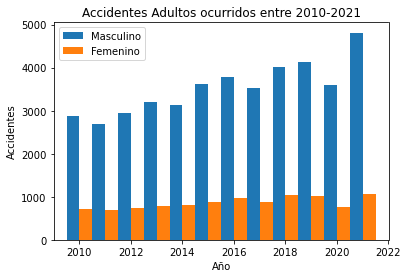

In [21]:
width = 0.5

#f, (ax1, ax2, x3) = plt.subplots(1, 3, sharey=True)
fig, ax1 = plt.subplots()

bar_am = ax1.bar(año - width/2, y_adultos_m, width=width, label='Masculino')
bar_af = ax1.bar(año + width/2, y_adultos_f, width=width, label='Femenino')
ax1.set(xlim=(2009, 2022))
#ax1.set_xticks(año)
ax1.legend()
ax1.set_xlabel('Año')
ax1.set_ylabel('Accidentes')
ax1.set_title('Accidentes Adultos ocurridos entre 2010-2021')



plt.show()



In [22]:
año = fecha_adolecentes_año.index
x = np.arange(len(año))
y_adolecentes_m = fecha_adolecentes_año['MASCULINO'].values
y_adolecentes_f = fecha_adolecentes_año['FEMENINO'].values

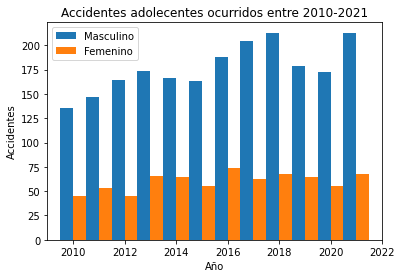

In [23]:
fig, ax2 = plt.subplots()

bar_am = ax2.bar(año - width/2, y_adolecentes_m, width=width, label='Masculino')
bar_af = ax2.bar(año + width/2, y_adolecentes_f, width=width, label='Femenino')
ax2.set(xlim=(2009, 2022))
#ax2.set_xticks(año)
ax2.legend()
ax2.set_xlabel('Año')
ax2.set_ylabel('Accidentes')
ax2.set_title('Accidentes adolecentes ocurridos entre 2010-2021')

plt.show()

In [24]:
año = fecha_menores_año.index
x = np.arange(len(año))
y_menores_m = fecha_menores_año['MASCULINO'].values
y_menores_f = fecha_menores_año['FEMENINO'].values

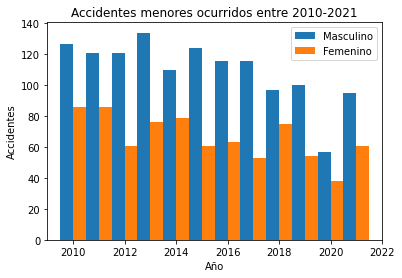

In [25]:
fig, ax3 = plt.subplots()

bar_am = ax3.bar(año - width/2, y_menores_m, width=width, label='Masculino')
bar_af = ax3.bar(año + width/2, y_menores_f, width=width, label='Femenino')
ax3.set(xlim=(2009, 2022))
#ax3.set_xticks(año)
ax3.legend()
ax3.set_xlabel('Año')
ax3.set_ylabel('Accidentes')
ax3.set_title('Accidentes menores ocurridos entre 2010-2021')

plt.show()

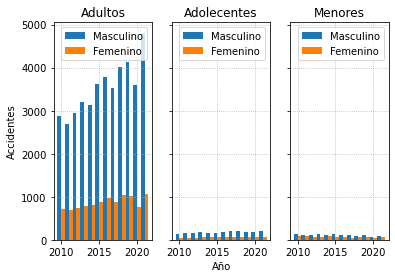

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3 , sharey=True)

bar_am = ax1.bar(año - width/2, y_adultos_m, width=width, label='Masculino')
bar_af = ax1.bar(año + width/2, y_adultos_f, width=width, label='Femenino')
ax1.set(xlim=(2009, 2022))
##ax1.set_xticks(año)
ax1.legend()
#ax1.set_xlabel('Año')
ax1.set_ylabel('Accidentes')
ax1.set_title('Adultos')

bar_adm = ax2.bar(año - width/2, y_adolecentes_m, width=width, label='Masculino')
bar_adf = ax2.bar(año + width/2, y_adolecentes_f, width=width, label='Femenino')
ax2.set(xlim=(2009, 2022))
##ax2.set_xticks(año)
ax2.legend()
ax2.set_xlabel('Año')
#ax2.set_ylabel('Accidentes')
ax2.set_title('Adolecentes')

bar_mm = ax3.bar(año - width/2, y_menores_m, width=width, label='Masculino')
bar_mf = ax3.bar(año + width/2, y_menores_f, width=width, label='Femenino')
ax3.set(xlim=(2009, 2022))
#0#ax3.set_xticks(año)
ax3.legend()
#ax3.set_xlabel('Año')
#ax3.set_ylabel('Accidentes')
ax3.set_title('Menores')

ax1.grid(linestyle=':')
ax2.grid(linestyle=':')
ax3.grid(linestyle=':')

f.savefig('Imgs/grupos.pdf')

plt.show()